# Implementation of clustering algorithms

Build K-Means and Agglomerative Clustering models to perform an unsupervised clustering by using given data. Follow below steps as a guideline for building your model and explain each of them in code lines. 

* Data cleaning (25 points)

Start with data cleaning to ensure that your data is correct, consistent and usable. The techniques used for data cleaning may vary but you can consider to follow these basic steps: handling missing values, encoding categorical features, extracting useful features by using existing features, handling outliers etc.

* Data Preprocessing (25 points)

In this step you should transform raw data into an understandable format for machine learning algorithms. This step may include scaling the features, performing dimensionality reduction etc.

* Clustering (30)

The goal of this step is to find distinct groups or “clusters” within a data set by using K-Means and Agglomerative Clustering Algorithms. Apply Elbow Method to determine the number of clusters. After building models, examine and comment the clusters formed via scatter plot.

* Silhouette Scores (20)

To evaluate how “well clustered” data points are, use the “silhouette score” and plot the Silhouette Scores for all of data points.

Note: Don't forget to explain your codes and comment on the obtained result.

In [137]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading data ,Cleaning , Preprocessing

In [138]:
df = pd.read_csv("data.csv", delimiter=",")  #read csv with pandas
print("Number of rows = ",len(df),"\nNumber of Columns = ",len(df.columns))
df.head()

Number of rows =  1001 
Number of Columns =  30


,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


In [139]:
df.drop(columns=["Unnamed: 0"],axis=1,inplace=True)  ##just deleting unnecessary column

In [140]:
df.tail(5)  ##Last 5 records

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
996,8492,1978,Graduation,Together,75437.0,0,0,09-11-2013,25,795,...,6,0,0,0,1,0,0,3,11,0
997,11188,1957,Graduation,Together,26091.0,1,1,25-02-2014,84,15,...,5,0,0,0,0,0,0,3,11,0
998,1212,1973,Graduation,Married,52845.0,1,0,13-08-2013,7,384,...,6,1,0,0,0,0,0,3,11,0
999,9097,1956,Graduation,Divorced,46086.0,0,1,03-11-2013,34,244,...,4,0,0,0,0,0,0,3,11,0
1000,10473,1956,PhD,Widow,78028.0,0,1,10-09-2012,38,158,...,7,0,1,1,0,0,0,3,11,1


In [141]:
df.dtypes  ##checking columns and their types

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [142]:
pd.Series({col:df[col].unique() for col in df})  ##Unique values of each column

ID                     [5524, 2174, 4141, 6182, 5324, 7446, 965, 6177...
Year_Birth             [1957, 1954, 1965, 1984, 1981, 1967, 1971, 198...
Education                     [Graduation, PhD, Master, Basic, 2n Cycle]
Marital_Status         [Single, Together, Married, Divorced, Widow, A...
Income                 [58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ...
Kidhome                                                        [0, 1, 2]
Teenhome                                                       [0, 1, 2]
Dt_Customer            [04-09-2012, 08-03-2014, 21-08-2013, 10-02-201...
Recency                [58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8...
MntWines               [635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6...
MntFruits              [88, 1, 49, 4, 43, 42, 65, 10, 0, 5, 16, 61, 2...
MntMeatProducts        [546, 6, 127, 20, 118, 98, 164, 56, 24, 11, 48...
MntFishProducts        [172, 2, 111, 10, 46, 0, 50, 3, 1, 11, 225, 6,...
MntSweetProducts       [88, 1, 21, 3, 27, 42, 49, 2

In [143]:
df.isnull().sum().sort_values(ascending =False).head()  ##seeing how many missing datas we have we have just incomes that has not been specified            

Income               13
ID                    0
NumDealsPurchases     0
Z_Revenue             0
Z_CostContact         0
dtype: int64

In [144]:
df.dropna(subset=["Income"],inplace=True)  ##dropping missing values since they are just 13 records
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

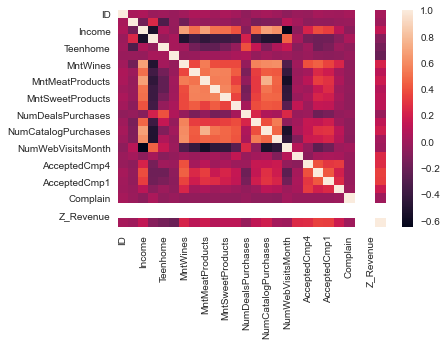

In [145]:
## corr map too see relationship between variables
sns.heatmap(df.corr());

In [146]:
df.drop(["Dt_Customer"],axis=1,inplace=True)
df.drop(["ID"],axis=1,inplace=True)
df.drop(["Z_Revenue"],axis=1,inplace=True)
df.drop(["Z_CostContact"],axis=1,inplace=True)  ##all datapoints have same Z_revenue and same z_costcontact so drop it
df.drop_duplicates(inplace=True)

array([[<AxesSubplot:title={'center':'Year_Birth'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Kidhome'}>,
        <AxesSubplot:title={'center':'Teenhome'}>,
        <AxesSubplot:title={'center':'Recency'}>],
       [<AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>,
        <AxesSubplot:title={'center':'MntFishProducts'}>,
        <AxesSubplot:title={'center':'MntSweetProducts'}>],
       [<AxesSubplot:title={'center':'MntGoldProds'}>,
        <AxesSubplot:title={'center':'NumDealsPurchases'}>,
        <AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>,
        <AxesSubplot:title={'center':'NumStorePurchases'}>],
       [<AxesSubplot:title={'center':'NumWebVisitsMonth'}>,
        <AxesSubplot:title={'center':'AcceptedCmp3'}>,
        <AxesSubplot:title={'center':'AcceptedCmp4'}>,
 

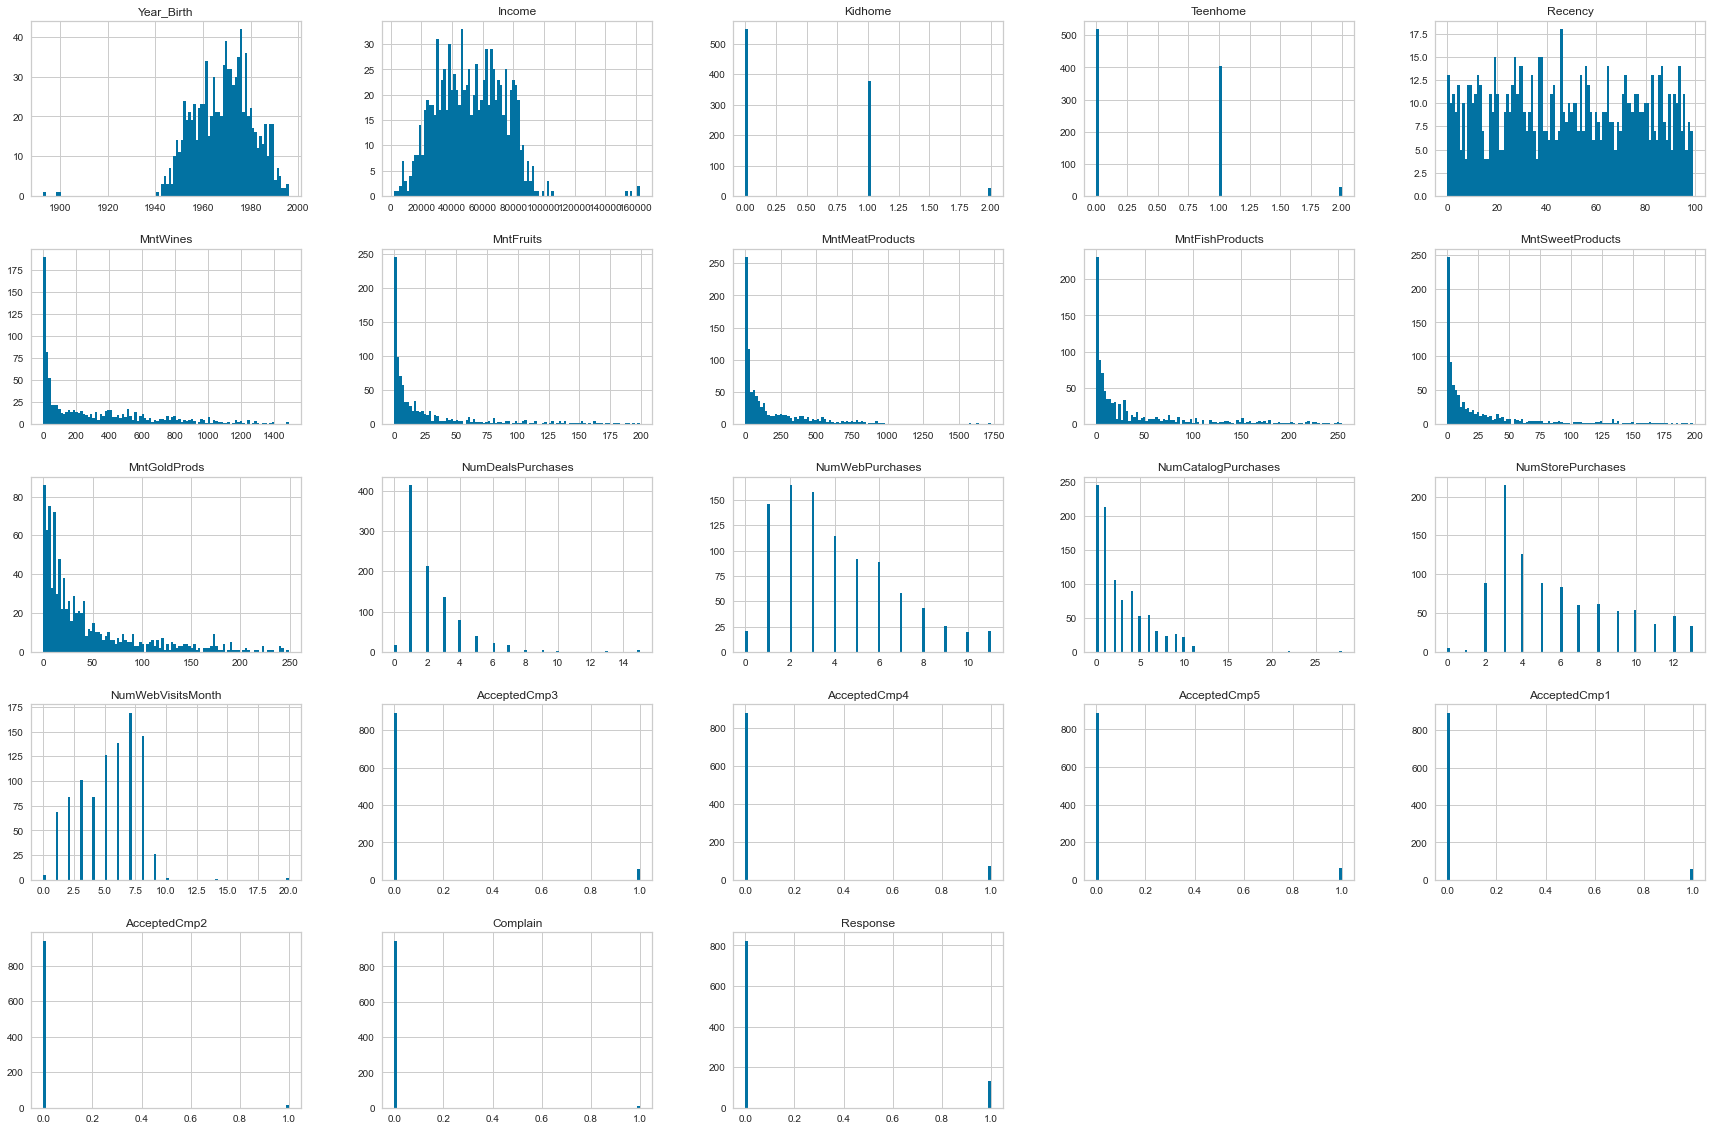

In [147]:
df.hist(bins=100,figsize=(30,20))  ##showing distrubition of data , trying to see whether there are any outliers

In [148]:
df = df[df["Year_Birth"]>1915] ##just cleanig outliers
df = df[df["Income"]<150000]

In [149]:
df.Education.replace({'2n Cycle':'Master'}, inplace=True)
df.Marital_Status.replace({'Alone':'Single'},inplace=True)  ##just replacing values that same

In [150]:
print("Number of rows = ",len(df),"\nNumber of Columns = ",len(df.columns))

Number of rows =  946 
Number of Columns =  25


### Encoding Categorical Data

In [151]:
from sklearn.preprocessing import LabelEncoder

In [152]:
from sklearn.preprocessing import LabelEncoder

#Auto encodes any dataframe column of type category or object.
def dummyEncode(df,columnsToEncode):
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df
    
df = dummyEncode(df,["Marital_Status","Education"])
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,1,2,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,1,2,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,1,3,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,1,3,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,3,1,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1954,1,0,64587.0,1,1,49,66,0,16,...,1,4,3,0,0,0,0,0,0,0
996,1978,1,3,75437.0,0,0,25,795,0,545,...,4,10,6,0,0,0,1,0,0,0
998,1973,1,1,52845.0,1,0,7,384,25,292,...,8,6,6,1,0,0,0,0,0,0
999,1956,1,0,46086.0,0,1,34,244,8,32,...,1,8,4,0,0,0,0,0,0,0


### Scaling 

In [153]:
from sklearn.preprocessing import MinMaxScaler

In [154]:
scaler = MinMaxScaler()
df.loc[:,df.columns !="Dt_Customer"] = scaler.fit_transform(df.loc[:, df.columns != "Dt_Customer"])


In [155]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0.290909,0.333333,0.50,0.540563,0.0,0.0,0.585859,0.425603,0.442211,0.316125,...,0.357143,0.307692,0.35,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.236364,0.333333,0.50,0.426085,0.5,0.5,0.383838,0.007373,0.005025,0.002900,...,0.035714,0.153846,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.436364,0.333333,0.75,0.671358,0.0,0.0,0.262626,0.285523,0.246231,0.073086,...,0.071429,0.769231,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.781818,0.333333,0.75,0.234887,0.5,0.0,0.262626,0.007373,0.020101,0.011021,...,0.000000,0.307692,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.727273,1.000000,0.25,0.542068,0.5,0.0,0.949495,0.115952,0.216080,0.067865,...,0.107143,0.461538,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
df.describe() ##some specific info abour our data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,...,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,0.508918,0.562016,0.433932,0.481754,0.226744,0.241543,0.491394,0.207452,0.128539,0.097949,...,0.097516,0.452513,0.263319,0.063425,0.076110,0.067653,0.063425,0.013742,0.007400,0.137421
std,0.213484,0.279782,0.268980,0.202670,0.276243,0.277093,0.289705,0.226123,0.198339,0.128232,...,0.104859,0.248397,0.119776,0.243855,0.265314,0.251283,0.243855,0.116480,0.085747,0.344473
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.345455,0.333333,0.250000,0.320454,0.000000,0.000000,0.252525,0.015416,0.005025,0.008701,...,0.000000,0.230769,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.527273,0.333333,0.500000,0.476117,0.000000,0.000000,0.484848,0.123660,0.040201,0.039443,...,0.071429,0.384615,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.668182,0.666667,0.750000,0.642661,0.500000,0.500000,0.747475,0.341655,0.140704,0.145302,...,0.142857,0.615385,0.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Dimensionality Reduction

In [157]:
from sklearn.decomposition import PCA 

In [158]:
pca = PCA(2) 
pca_data = pd.DataFrame(pca.fit_transform(df),columns=["PC1","PC2"]) 

In [159]:
pca_data  ##now we reduced the dimension in our data it has 2 cols. Now it is ready to clustering.

,PC1,PC2
0,0.773347,0.345836
1,-0.572989,0.012450
2,0.401820,-0.274868
3,-0.561080,0.206226
4,-0.180192,-0.160183
...,...,...
941,-0.432237,-0.080317
942,0.684362,-0.022572
943,0.133770,0.170395
944,-0.091955,-0.238130


# CLUSTERING

In [160]:
from sklearn.cluster import KMeans

### KMeans

In [161]:
w = []
for k in range(1,22):
    kmeans = KMeans(n_clusters = k,random_state = 42)
    kmeans.fit(pca_data)
    inert = kmeans.inertia_
    print("Inertia for ",k," == ",inert)
    w.append(inert)
    

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Inertia for  1  ==  427.60101479370553
Inertia for  2  ==  212.8331272897391
Inertia for  3  ==  113.46575977548991
Inertia for  4  ==  81.2763669828071
Inertia for  5  ==  59.283372257150575
Inertia for  6  ==  46.712087002777935
Inertia for  7  ==  37.84164717111929
Inertia for  8  ==  33.57413401957749
Inertia for  9  ==  29.773938769984746
Inertia for  10  ==  26.991995738869928
Inertia for  11  ==  24.97816779199438
Inertia for  12  ==  23.09381455746794
Inertia for  13  ==  21.249727597744954
Inertia for  14  ==  19.845651811634205
Inertia for  15  ==  18.53538388719841
Inertia for  16  ==  17.540122122969585
Inertia for  17  ==  16.670778850493356
Inertia for  18  ==  15.604293385688445
Inertia for  19  ==  14.945106327536694
Inertia for  20  ==  14.33110439938227
Inertia for  21  ==  13.57457349587765


### Using ElbowVisualizer

In [162]:
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


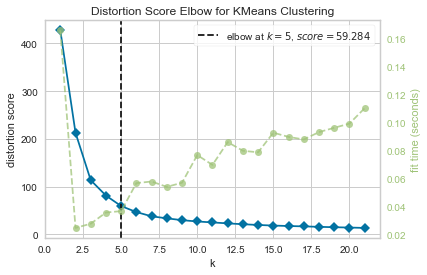

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [163]:
visualizer = KElbowVisualizer(KMeans(),k=(1,22))
visualizer.fit(pca_data)
visualizer.poof()

## as our method says k = 5 is fine for Kmeans model so lets fit it

### Using My elbow to confirm

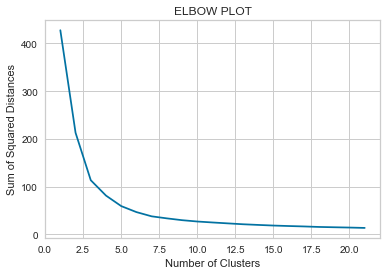

In [164]:

plt.plot(range(1,22),w,'bx-')
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distances")
plt.title("ELBOW PLOT")
plt.show()

In [165]:
## I DECIDED TO CHOOSE 5 I MIGHT CHANGE LATER
km = KMeans(n_clusters =5)
km.fit(pca_data)
preds = km.predict(pca_data)
preds[:15]  ##predictions

array([0, 2, 4, 2, 1, 1, 1, 2, 3, 2, 2, 4, 1, 2, 0])

In [166]:
new_df = df
new_df["Labels"] = km.labels_
new_df.head() ## I added labels to dataframe shows which datapoint belongs to which cluster

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Labels
0,0.290909,0.333333,0.50,0.540563,0.0,0.0,0.585859,0.425603,0.442211,0.316125,...,0.307692,0.35,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0.236364,0.333333,0.50,0.426085,0.5,0.5,0.383838,0.007373,0.005025,0.002900,...,0.153846,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.436364,0.333333,0.75,0.671358,0.0,0.0,0.262626,0.285523,0.246231,0.073086,...,0.769231,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.781818,0.333333,0.75,0.234887,0.5,0.0,0.262626,0.007373,0.020101,0.011021,...,0.307692,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.727273,1.000000,0.25,0.542068,0.5,0.0,0.949495,0.115952,0.216080,0.067865,...,0.461538,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### Visualizing

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

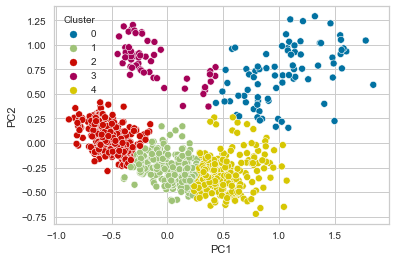

In [167]:
pca_data['Cluster'] = pd.Categorical(km.labels_)

sns.scatterplot(x="PC1",y="PC2",hue="Cluster",data=pca_data)  ##AS WE CAN SEE IN THE GRAPH 15 WOULD BE BETTER

## Agglomerative Clustering 

In [168]:
from sklearn.cluster import AgglomerativeClustering

In [169]:
agg = AgglomerativeClustering(n_clusters = 5,linkage='ward')
pca_data.drop(columns="Cluster",axis=1,inplace=True)
agg.fit(pca_data)

AgglomerativeClustering(n_clusters=5)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

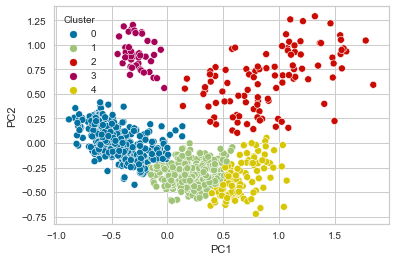

In [170]:
pca_data['Cluster'] = pd.Categorical(agg.labels_)

sns.scatterplot(x="PC1",y="PC2",hue="Cluster",data=pca_data)  ##AS WE CAN SEE IN THE GRAPH 15 WOULD BE BETTER

# Sılhoutte Scores

In [171]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

In [172]:
pca_data.drop(columns="Cluster",axis=1,inplace=True)

In [173]:
def SilhoutteKmeans(x):
    sil = {}
    for k in range(2,22):
        kmeans = KMeans(n_clusters = k).fit(x)
        labels = kmeans.labels_
        sil[k]=silhouette_score(x,labels,metric="euclidean")
        
    return sil

def SilhoutteAgg(x):
    sil = {}
    for k in range(2,22):
        agg = AgglomerativeClustering(n_clusters = k).fit(x)
        labels = agg.labels_
        sil[k]=silhouette_score(x,labels,metric="euclidean")
        
    return sil

In [174]:
km_score = silhouette_score(pca_data,km.labels_)
km_score

0.49729370158789804

In [175]:
agg_score =  silhouette_score(pca_data,agg.labels_)
agg_score

0.4825192820007216

Text(0.5, 1.0, 'Silhouette scores by Number of Clusters for KMEANS')

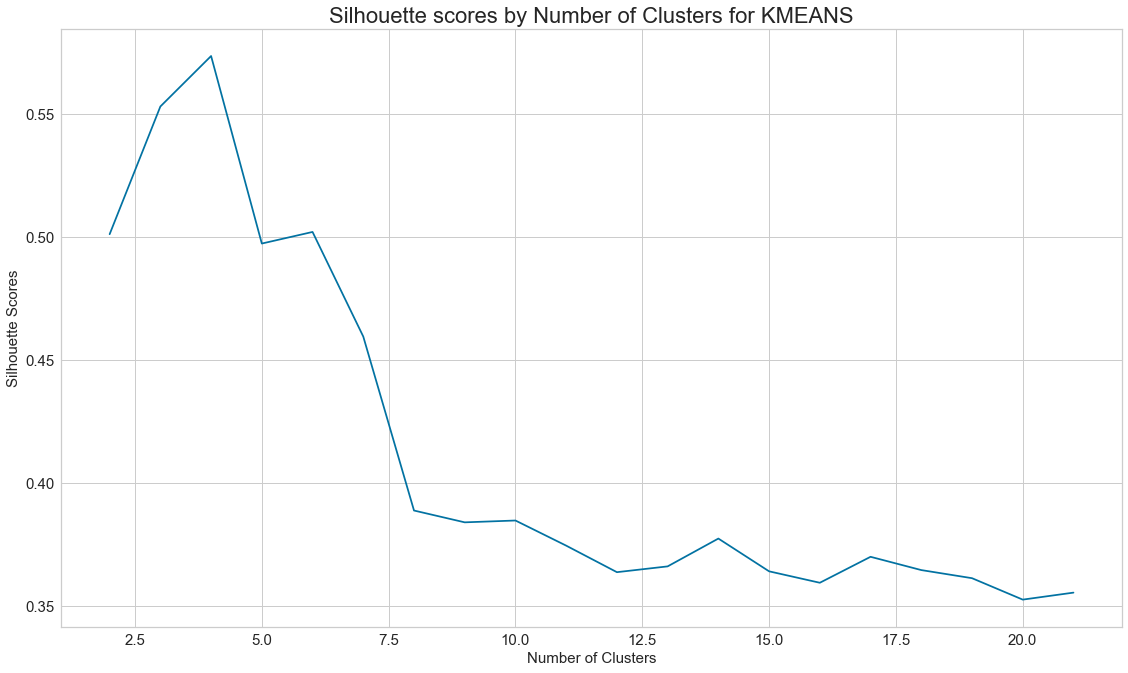

In [176]:
fig = plt.figure(figsize=(19,11))
ax = fig.add_subplot(1,1,1)
ax.tick_params(axis="both",which="major",labelsize=15)
dict_ = SilhoutteKmeans(pca_data)
myList = dict_.items()
myList = sorted(myList) 
a,b= zip(*myList) 
ax.plot(a,b)
ax.set_xlabel("Number of Clusters",fontsize=15)
ax.set_ylabel("Silhouette Scores",fontsize=15)
ax.set_title("Silhouette scores by Number of Clusters for KMEANS",fontsize = 22)

Text(0.5, 1.0, 'Silhouette scores by Number of Clusters for Agglomerative Clustering')

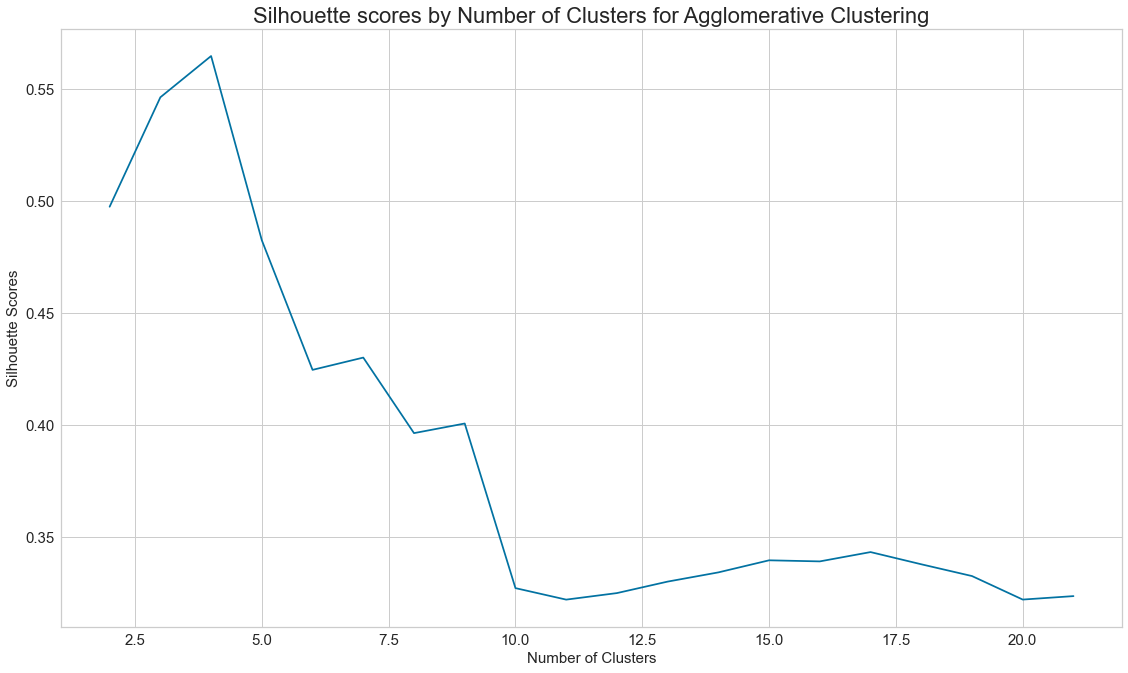

In [177]:
fig = plt.figure(figsize=(19,11))
ax = fig.add_subplot(1,1,1)
ax.tick_params(axis="both",which="major",labelsize=15)
dict_ = SilhoutteAgg(pca_data)
myList = dict_.items()
myList = sorted(myList) 
a,b= zip(*myList) 
ax.plot(a,b)
ax.set_xlabel("Number of Clusters",fontsize=15)
ax.set_ylabel("Silhouette Scores",fontsize=15)
ax.set_title("Silhouette scores by Number of Clusters for Agglomerative Clustering",fontsize = 22)

## BOTH GRAPH LOOKS SAME AT THE BEGINNING BUT AFTER 7.5 IT STARTS TO CHANGE

### IN THE SILHOUETTE GRAPHS IT HAS PEAK AT 3.75 -4.25 
### BOT GRAPH LOOKS SAME AT THE BEGINNING BUT AFTER 5 IT STARTS TO CHANGE